<a href="https://colab.research.google.com/github/Pathway2008/Loan_rating/blob/main/variables%20differently%20per%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Semiconductor/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Semiconductor/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/Semiconductor/sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        213 non-null    object
 1   img_path  213 non-null    object
 2   label     213 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ KB


In [ ]:
import os
import cv2
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load pre-trained model for feature extraction
# Replace 'your_pretrained_model_path' with the actual path to your pre-trained model
# For example, you might use a pre-trained model like ResNet or VGG for feature extraction
# Here, we assume a simple example using color histograms for feature extraction

def extract_features(image_path):
    image = cv2.imread(image_path)
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = hist.flatten()
    return hist

# Load training images
train_path = "/content/drive/MyDrive/Semiconductor/train"
train_images = []
for file_name in os.listdir(train_path):
    image_path = os.path.join(train_path, file_name)
    features = extract_features(image_path)
    train_images.append(features)

# Convert to NumPy array
train_images = np.array(train_images)

# Standardize the features
# scaler = StandardScaler()
# train_images_scaled = scaler.fit_transform(train_images)

# Train Isolation Forest model
model = IsolationForest(contamination='auto', random_state=42)
model.fit(train_images)

# Load test images
test_path = "/content/drive/MyDrive/Semiconductor/test"
test_images = []
for file_name in os.listdir(test_path):
    image_path = os.path.join(test_path, file_name)
    features = extract_features(image_path)
    test_images.append(features)

# Convert to NumPy array
test_images = np.array(test_images)

# Standardize the test features
# test_images_scaled = scaler.transform(test_images)

# Predict anomalies (1) or normal (0) using Isolation Forest
predictions = model.predict(test_images)

# Print the predictions
print("Predictions:", predictions)

Predictions: [ 1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1]


In [ ]:
test_pred = np.where(predictions == -1, 1, 0)
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
test_pred = np.where(predictions == -1, 1, 0)
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
sub['label'] = test_pred

In [ ]:
sub.to_csv('IF+standard.csv',index=False)

convolutional autoencode

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
SIZE = 128
batch_size = 64
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Semiconductor/train',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

Found 213 images belonging to 1 classes.


In [ ]:
anomaly_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Semiconductor/test (1)',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

Found 100 images belonging to 1 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 16)        0

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch= 500 // batch_size,
        epochs=1000,
        shuffle = True)

Epoch 1/1000
4/7 [================>.............] - ETA: 8s - loss: 0.0359 - mse: 0.0359

7/7 [==============================] - 14s 1s/step - loss: 0.0359 - mse: 0.0359


new

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/drive/MyDrive/Semiconductor/train'
test_data_dir = '/content/drive/MyDrive/Semiconductor/test (1)'
img_width, img_height = 220, 220  # Adjust as needed

# Create data generator for training set
train_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='input',  # Use 'input' to create autoencoder
    shuffle=True
)

# Create data generator for test set (anomalies)
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,  # Batch size 1 for individual predictions
    class_mode=None,  # No labels for prediction
    shuffle=False  # Maintain order for evaluation
)

Found 213 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Model architecture
input_img = Input(shape=(img_width, img_height, 3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 8)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for image reconstruction

In [ ]:
autoencoder.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(train_generator)
)

In [ ]:
# Predict on test set
predictions = autoencoder.predict(test_generator, steps=len(test_generator))

# Calculate reconstruction error for each image
reconstruction_errors = []
for i in range(len(predictions)):
    mse = ((predictions[i] - test_generator[i]) ** 2).mean()
    reconstruction_errors.append(mse)

# Set a threshold for anomaly detection
threshold = 0.01  # Adjust as needed

# Determine anomalies
anomalies = [1 if error > threshold else 0 for error in reconstruction_errors]
print(anomalies)

100/100 [==============================] - 2s 21ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
import cv2

# Read the image file
image_path = "/content/drive/MyDrive/Semiconductor/train/train/TRAIN_000.png"
img = cv2.imread(image_path)

# Get the full size (height, width) of the image
full_size = img.shape[:2]  # Shape returns (height, width, channels)
print("Full size of the image:", full_size)

Full size of the image: (512, 512)


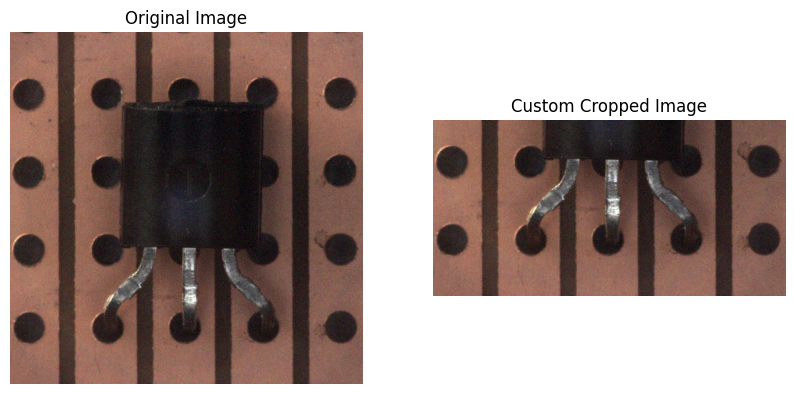

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Function to load and preprocess an image with the specified cropping
def load_and_custom_crop(image_path):
    img = load_img(image_path)
    img_array = img_to_array(img)

    # Define the coordinates for the cropping region
    x_start, x_end = 0, 512
    y_start, y_end = 257, 512

    # Crop the image based on the specified coordinates
    cropped_img = img_array[y_start:y_end, x_start:x_end, :]

    # Reshape to (1, height, width, 3) for visualization
    cropped_img = cropped_img.reshape((1,) + cropped_img.shape)

    return img_array, cropped_img

# Example usage
image_path = "/content/drive/MyDrive/Semiconductor/train/train/TRAIN_000.png"
original_img, cropped_img = load_and_custom_crop(image_path)

# Display original and custom cropped images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_img / 255.0)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cropped_img[0] / 255.0)
axes[1].set_title('Custom Cropped Image')
axes[1].axis('off')

plt.show()